In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# movies
mnames = ['movieid','title','genres']
movies_data = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python', encoding='latin-1')
movies_data.head(5)

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# ratings
rnames = ['userid','movieid', 'rating', 'timestamp']
ratings_data = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python', encoding='latin-1')
ratings_data.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
#merge data movie dan ratings
movie_ratings_data=movies_data.merge(ratings_data, on = 'movieid', how = 'inner')
movie_ratings_data.head()

,movieid,title,genres,userid,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [6]:
# users
unames = ['userid','gender','age','occupation','zipcode']
users_data = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python', encoding='latin-1')
users_data.head(5)

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
# merge user and rating
data = pd.merge(movie_ratings_data, users_data)
data.head(5)

,movieid,title,genres,userid,rating,timestamp,gender,age,occupation,zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [8]:
# cari size group berdasarkan title movie
data_favorite_size = data.groupby('title').size()
data_favorite_size.head(5)

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [9]:
# cari size group by title and gender female
data_favorite_female = data.loc[data['gender'] == 'F']
data_favorite_female_size = data_favorite_female.groupby('title').size()
data_favorite_female_size.head(5)

title
$1,000,000 Duck (1971)           16
'Night Mother (1986)             36
'Til There Was You (1997)        37
'burbs, The (1989)               92
...And Justice for All (1979)    35
dtype: int64

In [10]:
# cari index dari title size female yang lebih besar dari XXX
search_index = data_favorite_female_size.index[data_favorite_female_size >= 500]
search_index

Index(['American Beauty (1999)', 'Babe (1995)', 'Back to the Future (1985)',
       'Being John Malkovich (1999)', 'Braveheart (1995)', 'Casablanca (1942)',
       'E.T. the Extra-Terrestrial (1982)', 'Fargo (1996)',
       'Forrest Gump (1994)', 'Ghostbusters (1984)', 'Groundhog Day (1993)',
       'Jurassic Park (1993)', 'L.A. Confidential (1997)',
       'Matrix, The (1999)', 'Men in Black (1997)',
       'Princess Bride, The (1987)', 'Pulp Fiction (1994)',
       'Raiders of the Lost Ark (1981)', 'Saving Private Ryan (1998)',
       'Schindler's List (1993)', 'Shakespeare in Love (1998)',
       'Shawshank Redemption, The (1994)', 'Silence of the Lambs, The (1991)',
       'Sixth Sense, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)', 'Toy Story (1995)',
       'Wizard of Oz, The (1939)'],
      dtype='object', name='title')

In [11]:
# judul film female size yang rating >= XXX
data_favorite_female_size.loc[search_index].sort_values(ascending=False)

title
American Beauty (1999)                                   946
Shakespeare in Love (1998)                               798
Silence of the Lambs, The (1991)                         706
Sixth Sense, The (1999)                                  664
Groundhog Day (1993)                                     658
Fargo (1996)                                             657
Star Wars: Episode VI - Return of the Jedi (1983)        653
Star Wars: Episode V - The Empire Strikes Back (1980)    648
Star Wars: Episode IV - A New Hope (1977)                647
Forrest Gump (1994)                                      644
Back to the Future (1985)                                639
Princess Bride, The (1987)                               636
Shawshank Redemption, The (1994)                         627
Schindler's List (1993)                                  615
E.T. the Extra-Terrestrial (1982)                        601
Toy Story (1995)                                         591
Babe (1995)       

In [12]:
# judul film yang by gender
data_bygender = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
data_bygender.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


## (1A) Top Rated Movies by Female (size=500)

In [13]:
top_female_rating = data_bygender.loc[search_index].sort_values(by='F', ascending=False)
top_female_rating.head(5)

gender,F,M
title,,
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Sixth Sense, The (1999)",4.477410,4.379944
"Wizard of Oz, The (1939)",4.355030,4.203138
"Princess Bride, The (1987)",4.342767,4.288942


In [14]:
# mengetahui size dari sebuah film all gender
data_favorite_size.loc['Close Shave, A (1995)']

657

In [15]:
# mengetahui size dari sebuah film male dan female
data_sum_bygender = data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = 'count')
data_sum_bygender

gender,F,M
title,,
"$1,000,000 Duck (1971)",16.0,21.0
'Night Mother (1986),36.0,34.0
'Til There Was You (1997),37.0,15.0
"'burbs, The (1989)",92.0,211.0
...And Justice for All (1979),35.0,164.0
...,...,...
"Zed & Two Noughts, A (1985)",8.0,21.0
Zero Effect (1998),59.0,242.0
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,2.0


In [16]:
data_sum_bygender.loc['American Beauty (1999)']

gender
F     946.0
M    2482.0
Name: American Beauty (1999), dtype: float64

## (1B) Top Rated Movies by Female (pivot langsung)

In [17]:
user_rating = data.groupby(['gender', 'title']).agg({'rating':[np.size, np.mean]})
user_rating.head(5)

rating          
                                       size      mean
gender title                                         
F      $1,000,000 Duck (1971)            16  3.375000
       'Night Mother (1986)              36  3.388889
       'Til There Was You (1997)         37  2.675676
       'burbs, The (1989)                92  2.793478
       ...And Justice for All (1979)     35  3.828571

In [18]:
df_gender_fsorted = user_rating.pivot_table(columns='gender', index='title', values=['rating', ('rating', 'mean')], aggfunc='mean').fillna(0)
df_gender_fsorted.sort_values(by=('rating', 'size', 'F'), ascending=False).head(10)

rating                   \
                                                        mean             size   
gender                                                     F         M      F   
title                                                                           
American Beauty (1999)                              4.238901  4.347301  946.0   
Shakespeare in Love (1998)                          4.181704  4.099936  798.0   
Silence of the Lambs, The (1991)                    4.271955  4.381944  706.0   
Sixth Sense, The (1999)                             4.477410  4.379944  664.0   
Groundhog Day (1993)                                3.735562  4.041358  658.0   
Fargo (1996)                                        4.217656  4.267780  657.0   
Star Wars: Episode VI - Return of the Jedi (1983)   3.865237  4.069058  653.0   
Star Wars: Episode V - The Empire Strikes Back ...  4.106481  4.344577  648.0   
Star Wars: Episode IV - A New Hope (1977)           4.302937  4.495307  647.0   
Forrest Gump (1994)                                 4.045031  4.105806  644.0   

                                                            
                                                            
gender                                                   M  
title                                                       
American Beauty (1999)                              2482.0  
Shakespeare in Love (1998)                          1571.0  
Silence of the Lambs, The (1991)                    1872.0  
Sixth Sense, The (1999)                             1795.0  
Groundhog Day (1993)                                1620.0  
Fargo (1996)                                        1856.0  
Star Wars: Episode VI - Return of the Jedi (1983)   2230.0  
Star Wars: Episode V - The Empire Strikes Back ...  2342.0  
Star Wars: Episode IV - A New Hope (1977)           2344.0  
Forrest Gump (1994)                                 1550.0

## (1C) Top Rated Movies by Female Only

In [19]:
female_rating = data.loc[data['gender'] == 'F']
female_rating

,movieid,title,genres,userid,rating,timestamp,gender,age,occupation,zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
999949,3753,"Patriot, The (2000)",Action|Drama|War,2697,5,973306590,F,50,17,87031
999950,3793,X-Men (2000),Action|Sci-Fi,2697,5,973307050,F,50,17,87031
999951,3827,Space Cowboys (2000),Action|Sci-Fi,2697,5,973306515,F,50,17,87031
999952,3863,"Cell, The (2000)",Sci-Fi|Thriller,2697,3,973306515,F,50,17,87031


In [20]:
user_female_rating = female_rating.groupby(['gender', 'title']).agg({'rating':[np.size, np.mean]})
user_female_rating

rating          
                                           size      mean
gender title                                             
F      $1,000,000 Duck (1971)                16  3.375000
       'Night Mother (1986)                  36  3.388889
       'Til There Was You (1997)             37  2.675676
       'burbs, The (1989)                    92  2.793478
       ...And Justice for All (1979)         35  3.828571
...                                         ...       ...
       Your Friends and Neighbors (1998)     27  2.888889
       Zed & Two Noughts, A (1985)            8  3.500000
       Zero Effect (1998)                    59  3.864407
       Zeus and Roxanne (1997)                9  2.777778
       eXistenZ (1999)                       71  3.098592

[3481 rows x 2 columns]

In [21]:
df_gender_fsorted1 = user_female_rating.pivot_table(values=['rating', ('rating', 'mean')],columns='gender', index='title', aggfunc='mean').fillna(0)
data_final = df_gender_fsorted1.sort_values(by=('rating', 'size', 'F'), ascending=False)
data_final.loc[search_index].sort_values(by=('rating', 'mean', 'F'), ascending=False).head()

rating       
                                      mean   size
gender                                   F      F
title                                            
Schindler's List (1993)           4.562602  615.0
Shawshank Redemption, The (1994)  4.539075  627.0
Sixth Sense, The (1999)           4.477410  664.0
Wizard of Oz, The (1939)          4.355030  507.0
Princess Bride, The (1987)        4.342767  636.0

## 2 Movies yg cewek suka tapi cowok ga suka
## Based (1B)

In [22]:
df_gender_fsorted.head(5)

rating                       
                                   mean            size       
gender                                F         M     F      M
title                                                         
$1,000,000 Duck (1971)         3.375000  2.761905  16.0   21.0
'Night Mother (1986)           3.388889  3.352941  36.0   34.0
'Til There Was You (1997)      2.675676  2.733333  37.0   15.0
'burbs, The (1989)             2.793478  2.962085  92.0  211.0
...And Justice for All (1979)  3.828571  3.689024  35.0  164.0

In [23]:
# hitung diff ratarata rating male dan female
df_gender_fsorted['diff_rating'] = abs(df_gender_fsorted['rating', 'mean', 'F'] - df_gender_fsorted['rating', 'mean', 'M'])
df_gender_fsorted.sort_values(by='diff_rating', ascending=False)

rating                        \
                                                 mean            size         
gender                                              F         M     F     M   
title                                                                         
Ulysses (Ulisse) (1954)                      0.000000  5.000000   0.0   1.0   
Song of Freedom (1936)                       5.000000  0.000000   1.0   0.0   
Smashing Time (1967)                         0.000000  5.000000   0.0   2.0   
Bittersweet Motel (2000)                     5.000000  0.000000   1.0   0.0   
Schlafes Bruder (Brother of Sleep) (1995)    0.000000  5.000000   0.0   1.0   
...                                               ...       ...   ...   ...   
On the Beach (1959)                          3.947368  3.947368  19.0  76.0   
Fled (1996)                                  2.571429  2.571429  14.0  91.0   
Spring Fever USA (a.k.a. Lauderdale) (1989)  1.000000  1.000000   1.0   2.0   
Killing of Sister George, The (1968)         3.500000  3.500000   4.0  12.0   
Inferno (1980)                               3.000000  3.000000   5.0  25.0   

                                            diff_rating  
                                                         
gender                                                   
title                                                    
Ulysses (Ulisse) (1954)                             5.0  
Song of Freedom (1936)                              5.0  
Smashing Time (1967)                                5.0  
Bittersweet Motel (2000)                            5.0  
Schlafes Bruder (Brother of Sleep) (1995)           5.0  
...                                                 ...  
On the Beach (1959)                                 0.0  
Fled (1996)                                         0.0  
Spring Fever USA (a.k.a. Lauderdale) (1989)         0.0  
Killing of Sister George, The (1968)                0.0  
Inferno (1980)                                      0.0  

[3706 rows x 5 columns]

## 2 Movies yg cewek suka tapi cowok ga suka

### Based (1A)

In [24]:
top_female_rating.head(5)

gender,F,M
title,,
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Sixth Sense, The (1999)",4.477410,4.379944
"Wizard of Oz, The (1939)",4.355030,4.203138
"Princess Bride, The (1987)",4.342767,4.288942


In [25]:
top_female_rating['diff'] = abs(top_female_rating['F'] - top_female_rating['M'])
top_female_rating.sort_values(by='diff', ascending=False)

gender,F,M,diff
title,,,
Groundhog Day (1993),3.735562,4.041358,0.305796
Saving Private Ryan (1998),4.114783,4.398941,0.284159
Braveheart (1995),4.016484,4.297839,0.281355
Pulp Fiction (1994),4.071956,4.346839,0.274883
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,0.238096
Jurassic Park (1993),3.579407,3.814197,0.234791
"Matrix, The (1999)",4.128405,4.362235,0.233830
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,0.203821
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,0.192371


## 3 Tampilan Grafik Bar

In [26]:
movies_data.head(5)

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
# expand and split year
movies_data['year'] = movies_data['title'].str.extract('.*\((.*)\).*', expand=False).astype(int)
movies_data

,movieid,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [28]:
# plot movie per year
movies_year = movies_data.groupby('year').size()
movies_year

year
1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Length: 81, dtype: int64

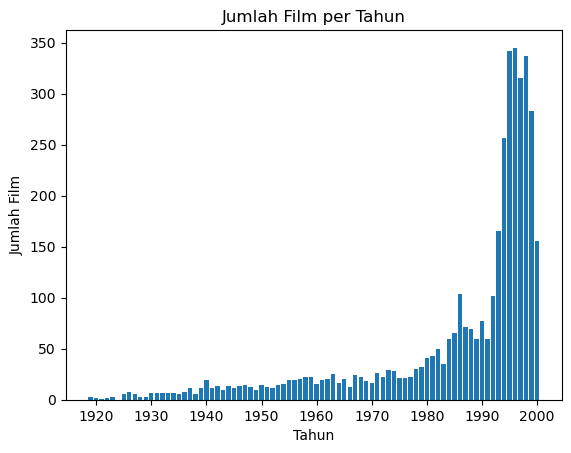

In [29]:
plt.bar(movies_year.index, movies_year.values)
# Memberi judul dan label pada grafik
plt.title('Jumlah Film per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Film')

# Menampilkan grafik
plt.show()